In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
df.info()
#no null values so no need to worry about them :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA
Detecting Outliers

C:\Users\Aun Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aun Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Aun Ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:

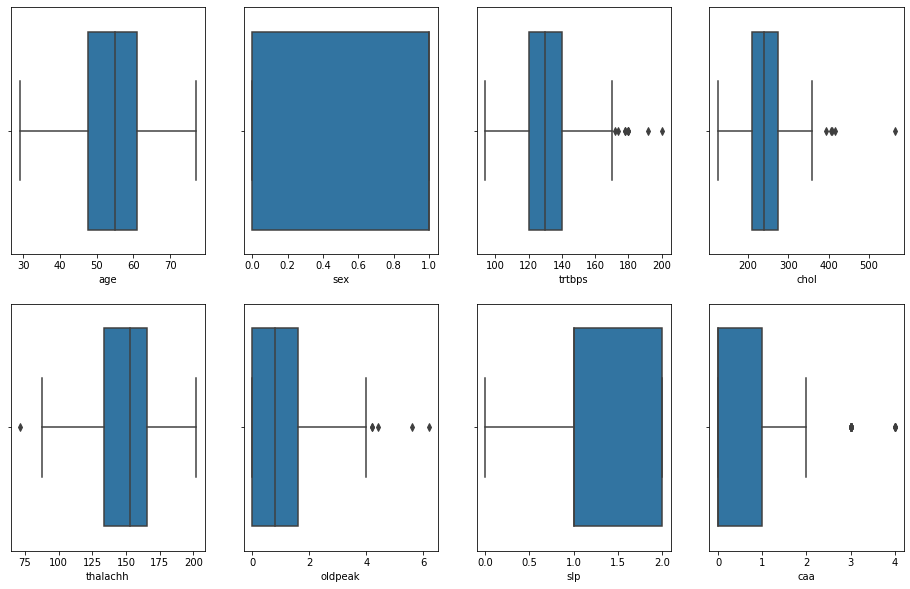

In [10]:
numeric_cols = df.drop(['cp','thall','output','fbs','restecg','exng'],axis=1).copy()
plt.show()
#numeric_cols
plt.figure(figsize=(16,10))
for i in range(len(numeric_cols.columns)):
   plt.subplot(2,4,i+1)
   sns.boxplot(numeric_cols[numeric_cols.columns[i]])
plt.show()    
    

# Heat Map

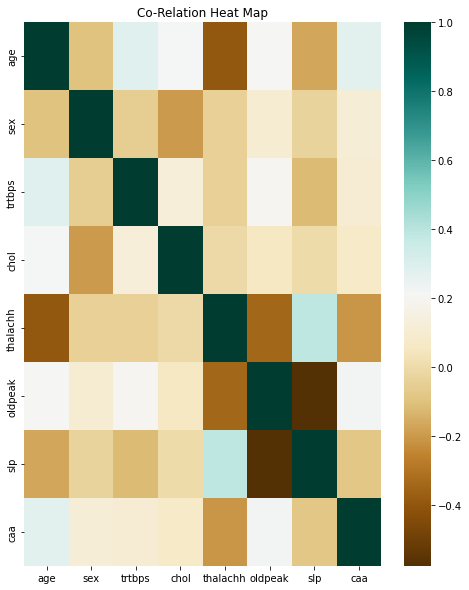

In [11]:
plt.figure(figsize = (8,10))
sns.heatmap(numeric_cols.corr(),cmap='BrBG')
plt.title('Co-Relation Heat Map')
plt.show()

# Dependent Variable Distribution

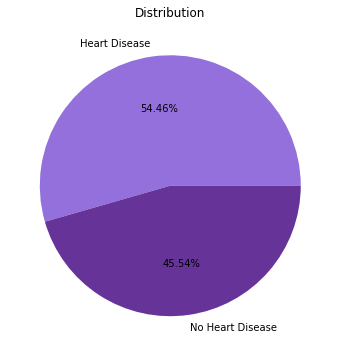

In [12]:
plt.figure(figsize=(6,6))
plt.pie(df['output'].value_counts(),labels=['Heart Disease','No Heart Disease'],colors = ['mediumpurple','rebeccapurple'],autopct ='%.2f%%' )
plt.title('Distribution')
plt.show()

## Gender Distribution

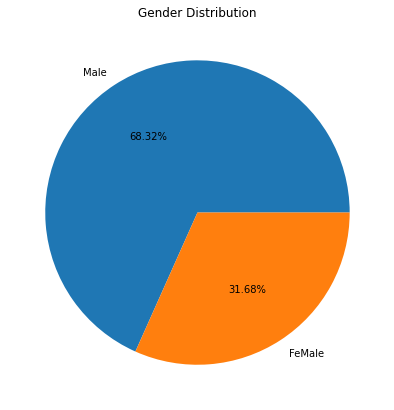

In [13]:
plt.figure(figsize=(7,7))
plt.pie(df['sex'].value_counts(),labels = ['Male','FeMale'],autopct='%.2f%%')
plt.title('Gender Distribution')
plt.show()

# Pre Processing

Hot One Enncoding

In [14]:
def HotOneEncode(df, prefix_dict):
    df = df.copy()
    for col,pre in prefix_dict.items():
        dummy = pd.get_dummies(df[col],prefix = pre)
        df = pd.concat([df,dummy],axis=1)
        df = df.drop(col,axis=1)
    return df

In [15]:
def PreProcess(data,scaler):
    #Encoding
    categorical_cols = ['cp','slp','thall']
    data = HotOneEncode(data,dict(zip(categorical_cols,['CP','SLP','THL'])))
    #SPLITTING
    x = data.drop('output',axis =1).copy()
    y = data['output'].copy()
    #Scaling 
    x = pd.DataFrame(scaler.fit_transform(x),columns= x.columns)
    return x,y

In [16]:
x,y = PreProcess(df,StandardScaler())

In [17]:
#{colum: len(x[colum].unique()) for colum in x.columns}

In [18]:
x

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,...,CP_1,CP_2,CP_3,SLP_0,SLP_1,SLP_2,THL_0,THL_1,THL_2,THL_3
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-0.714429,...,-0.444554,-0.634648,3.489114,3.664502,-0.926766,-0.939142,-0.081514,3.979112,-1.100763,-0.793116
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-0.714429,...,-0.444554,1.575677,-0.286606,3.664502,-0.926766,-0.939142,-0.081514,-0.251312,0.908461,-0.793116
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,-0.714429,...,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,-0.714429,...,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,-0.714429,...,-0.444554,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.714429,...,-0.444554,-0.634648,-0.286606,-0.272888,1.079021,-0.939142,-0.081514,-0.251312,-1.100763,1.260850
299,-1.033002,0.681005,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.714429,...,-0.444554,-0.634648,3.489114,-0.272888,1.079021,-0.939142,-0.081514,-0.251312,-1.100763,1.260850
300,1.503641,0.681005,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,1.244593,...,-0.444554,-0.634648,-0.286606,-0.272888,1.079021,-0.939142,-0.081514,-0.251312,-1.100763,1.260850
301,0.290464,0.681005,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,0.265082,...,-0.444554,-0.634648,-0.286606,-0.272888,1.079021,-0.939142,-0.081514,-0.251312,-1.100763,1.260850


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

# Training

Logistic Regression

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)
model = LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy: "+ str(round(model.score(x_test,y_test)*100,2)))

Accuracy: 90.16
